<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Ciencia-de-Datos-en-Ciencias-Economicas-con-Python/blob/master/Python_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando Python en análisis financiero y predictivo de Bitcoin**


## Extracción de datos

### Carga de librerías necesarias para la extracción de los datos

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
BTC2019 = pdr.DataReader("BTC-USD", start='2018-12-31', end='2019-12-29', data_source='yahoo')

Se crea el objeto Bitcoin 2019 para guardar todos los datos de las cotizaciones del bitcoin entre el intervalo de tiempo que inicia el día 31 de diciembre del 2018 hasta el día 29 de diciembre del 2019.

### Creación del dataframe

In [3]:
df = pd.DataFrame(BTC2019)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529
...,...,...,...,...,...,...
2019-12-26,7388.302734,7200.386719,7274.799316,7238.966797,22787010034,7238.966797
2019-12-27,7363.529297,7189.934082,7238.141113,7290.088379,22777360995,7290.088379
2019-12-28,7399.041016,7286.905273,7289.031250,7317.990234,21365673026,7317.990234


In [4]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

## Transformación de datos

In [5]:
df.insert(0,column='Day',value=pd.DatetimeIndex(df.index).day_name())
df.head()

,Day,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2018-12-31,Monday,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529


In [6]:
df.columns

Index(['Day', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
df.rename(columns={'Adj Close':'AdjClose'}, inplace=True)
df.head()

,Day,High,Low,Open,Close,Volume,AdjClose
Date,,,,,,,
2018-12-31,Monday,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529


### Conversión de las cotizaciones diarias del Bitcoin

In [8]:
df['Profitability'] = df.AdjClose.pct_change()
df.head()

,Day,High,Low,Open,Close,Volume,AdjClose,Profitability
Date,,,,,,,,
2018-12-31,Monday,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439,NaN
2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,0.026938
2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,0.025989
2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,-0.027050
2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,0.005467


Las cotizaciones del Bitcoin generalmente no son estacionarias, y por lo tanto, la media y la varianza cambian con el tiempo. Esto también podría significar observar algunas tendencias o estacionalidad en la serie de cotizaciones.

Por tal motivo al transformar las cotizaciones en rendimientos, se intenta hacer la serie de tiempo estacionaria. Se crea la columna con el cálculo de la rentabilidad simple.

### Limpieza del dataframe, eliminación de valores nulos

In [9]:
df.dropna(how='any', inplace=True)
df.head()

,Day,High,Low,Open,Close,Volume,AdjClose,Profitability
Date,,,,,,,,
2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,0.026938
2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,0.025989
2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,-0.027050
2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,0.005467
2019-01-05,Saturday,3904.903076,3836.900146,3851.973877,3845.194580,5137609823,3845.194580,-0.003246


## Visualización de la serie de tiempo

In [10]:
import matplotlib.pyplot as plt

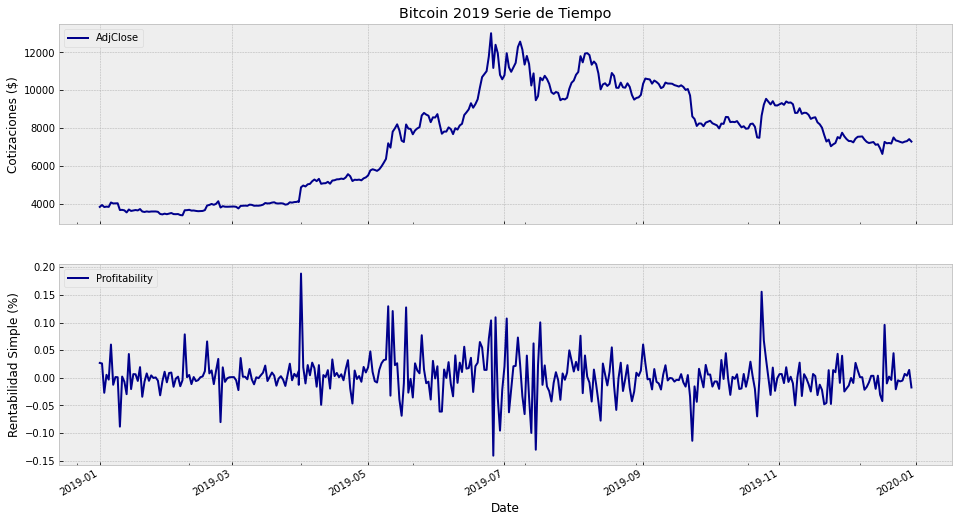

In [11]:
plt.style.use('bmh')
fig, ax = plt.subplots(2, 1, figsize=(16, 9), sharex=True)

df.AdjClose.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title = 'Bitcoin 2019 Serie de Tiempo', ylabel = 'Cotizaciones ($)')
ax[0].legend(loc='upper left')
   
df.Profitability.plot(ax=ax[1], color=['darkblue'])
ax[1].set(ylabel = 'Rentabilidad Simple (%)')
ax[1].legend(loc='upper left')

In [12]:
import seaborn as sb

In [13]:
print(df.groupby('Day').size())

Day
Friday       52
Monday       52
Saturday     52
Sunday       52
Thursday     52
Tuesday      52
Wednesday    52
dtype: int64


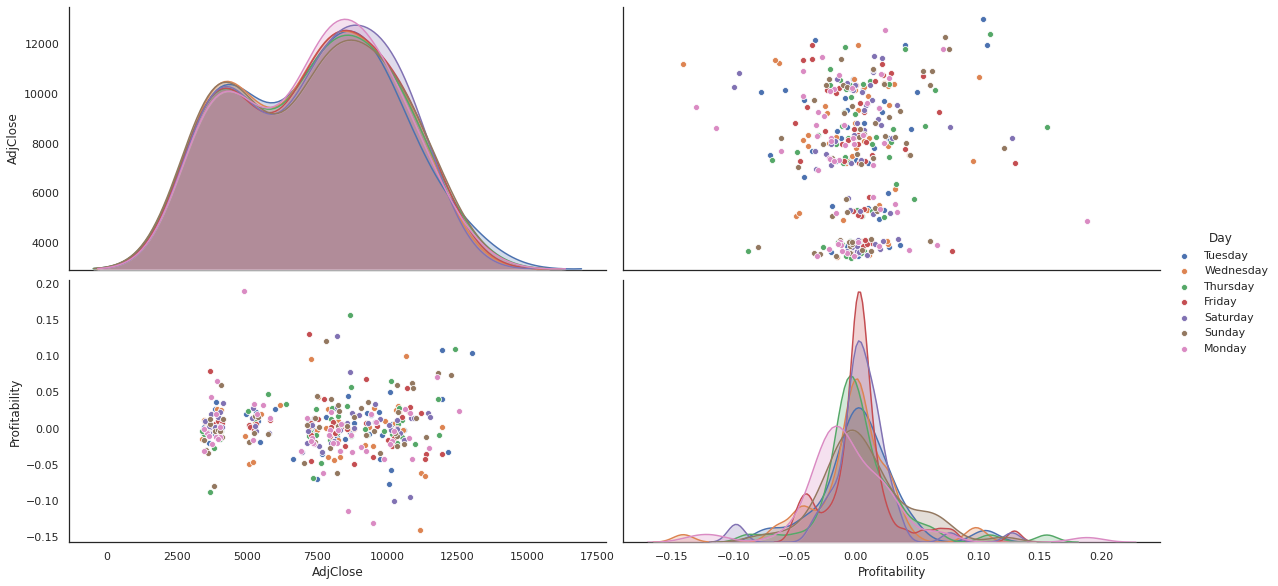

In [14]:
sb.set(style="white")
sb.pairplot(df, hue='Day', height=4, aspect=2, vars=["AdjClose","Profitability"])

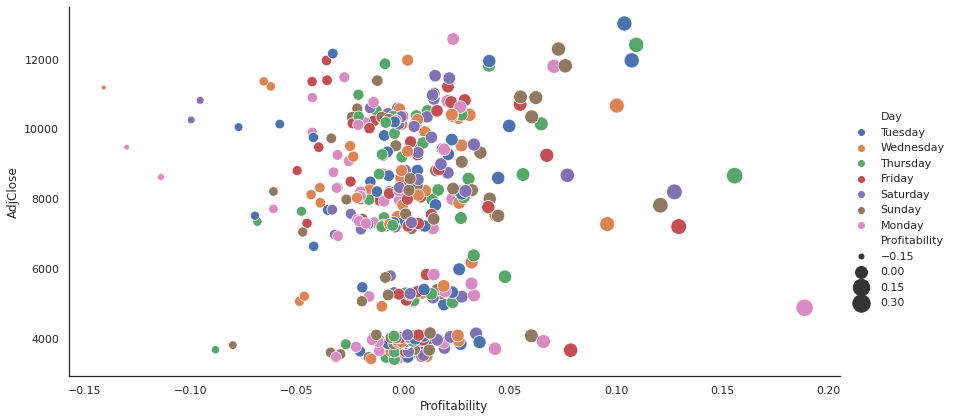

In [15]:
sb.set(style="white")
sb.relplot(x="Profitability", y="AdjClose", hue='Day', kind="scatter", size="Profitability", 
           sizes=(25,300), height=6, aspect=2, data=df)

## **Modelo de volatilidad**



Se toma en cuenta  la heterocedasticidad condicional, que es un fenómeno causado cuando un aumento en la volatilidad se correlaciona con un aumento adicional en la volatilidad. 

Por ejemplo: imaginamos que el precio del bitcoin baja significativamente debido a algunas noticias de última hora relacionadas con las criptodivisas. Una caída del precio tan repentina podría desencadenar en ventas de bitcoin, y esas ventas podrían hacer que el precio cayera aún más.

La volatilidad es un concepto increíblemente importante en  finanzas. Es sinónimo de riesgo y tiene muchas aplicaciones en finanzas cuantitativas. 
+ En primer lugar, se utiliza en el precio de opciones, ya que el modelo Black-Scholes se basa en la volatilidad del activo subyacente. 
+ En segundo lugar, la volatilidad tiene un impacto significativo en la gestión de riesgos, donde se utiliza para calcular métricas.
+ En tercer lugar, la volatilidad también está presente en el comercio, ya que se puede negociar directamente en forma del índice de volatilidad CBOE (símbolo de cotización: VIX). El nombre proviene del  Chicago Board Options Exchange, mediante el cual el índice se calcula en tiempo real.

In [16]:
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

### **Explicando la volatilidad de la rentabilidad del Bitcoin con modelos ARCH**

En este punto, se tratará  de explicar la volatilidad condicional de los retornos del Bitcoin, con el modelo de Heterocedasticidad Condicional Autorregresiva (ARCH).

In [17]:
pip install arch

In [18]:
import pandas as pd
from arch import arch_model

In [19]:
modelo_ARCH = arch_model(df['Profitability'], mean='Zero', vol='ARCH', p=1, o=0, q=0)

In [20]:
modelo_AJUSTADO_ARCH = modelo_ARCH.fit(disp='off')
print(modelo_AJUSTADO_ARCH.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          Profitability   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:                703.264
Distribution:                  Normal   AIC:                          -1402.53
Method:            Maximum Likelihood   BIC:                          -1394.73
                                        No. Observations:                  364
Date:                Fri, Aug 21 2020   Df Residuals:                      362
Time:                        04:11:34   Df Model:                            2
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.0023e-03  2.439e-04      4.110  3.952e-05 [5.

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


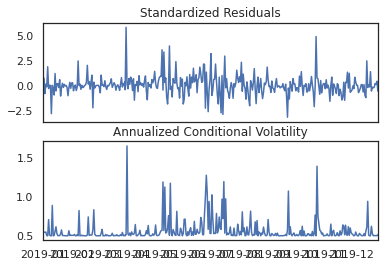

In [21]:
GraficoARCH = modelo_AJUSTADO_ARCH.plot(annualize='D')

Se puede observar que algunos residuos estandarizados  son grandes (en magnitud) y corresponden a periodos altamente volátiles.



### **Explicando la volatilidad de la rentabilidad del Bitcoin con modelos GARCH**


In [22]:
modelo_GARCH = arch_model(df['Profitability'], mean='Zero', vol='GARCH', p=1, o=0, q=1)

In [23]:
modelo_AJUSTADO_GARCH = modelo_GARCH.fit(disp='off')
print(modelo_AJUSTADO_GARCH.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          Profitability   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                      GARCH   Log-Likelihood:                714.675
Distribution:                  Normal   AIC:                          -1423.35
Method:            Maximum Likelihood   BIC:                          -1411.66
                                        No. Observations:                  364
Date:                Fri, Aug 21 2020   Df Residuals:                      361
Time:                        04:11:35   Df Model:                            3
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.6784e-04  1.830e-04      2.010  4.440e-02 [9.

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


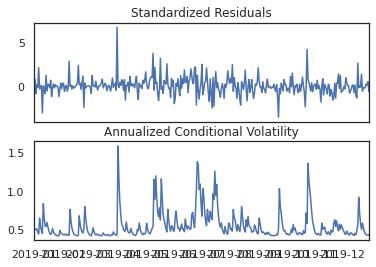

In [24]:
GraficoGARCH = modelo_AJUSTADO_GARCH.plot(annualize='D')

Cuando se usa ARCH, la serie de volatilidad condicional muestra muchos picos y luego regresa inmediatamente al nivel bajo. 

En el modelo GARCH, dado que el modelo también incluye volatilidad condicional, se necesita más tiempo para volver al nivel observado antes del pico.

## **Perceptrones multicapa para el pronóstico de series de tiempo.**

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [44]:
df.AdjClose.describe()

count      364.000000
mean      7395.800256
std       2642.245781
min       3399.471680
25%       4699.454224
50%       7853.039062
75%       9552.001221
max      13016.231445
Name: AdjClose, dtype: float64

Son un total de 364 registros, la media del precio de cierre adjustado es de \$7395 y un desvío de \$2642, es decir que por lo general estaremos entre un precio de cierre adjustado de \$4753 y \$10037.

### Procesando los datos del dataframe

In [45]:
PASOS=7

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df.AdjClose.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.907651,-0.886877,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693
8,-0.886877,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767
9,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882
10,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882,-0.940127
11,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882,-0.940127,-0.945547


### Creando la red neuronal

In [46]:
# split into train and test sets
values = reframed.values
n_train_days = 284+80 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(343, 1, 7) (343,) (14, 1, 7) (14,)


La arquitectura de la red neuronal será:

+ Entradas 7, como dijimos antes.
+ 1 capa oculta con 7 neuronas.
+ La salida será 1 sola neurona.

Las siete entradas corresponden a cada día de la semana.

In [47]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

### Entrenamiento del modelo y resultados obtenidos

In [48]:
EPOCHS=28

model = crear_modeloFF()
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 7)              56        
_________________________________________________________________
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Epoch 1/28
49/49 [==============================] - 0s 3ms/step - loss: 0.4287 - mse: 0.3121 - val_loss: 0.0492 - val_mse: 0.0049
Epoch 2/28
49/49 [==============================] - 0s 2ms/step - loss: 0.1365 - mse: 0.0305 - val_loss: 0.1046 - val_mse: 0.0150
Epoch 3/28
49/49 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.0255 - val_loss: 0.0954 - val_mse: 0.0128


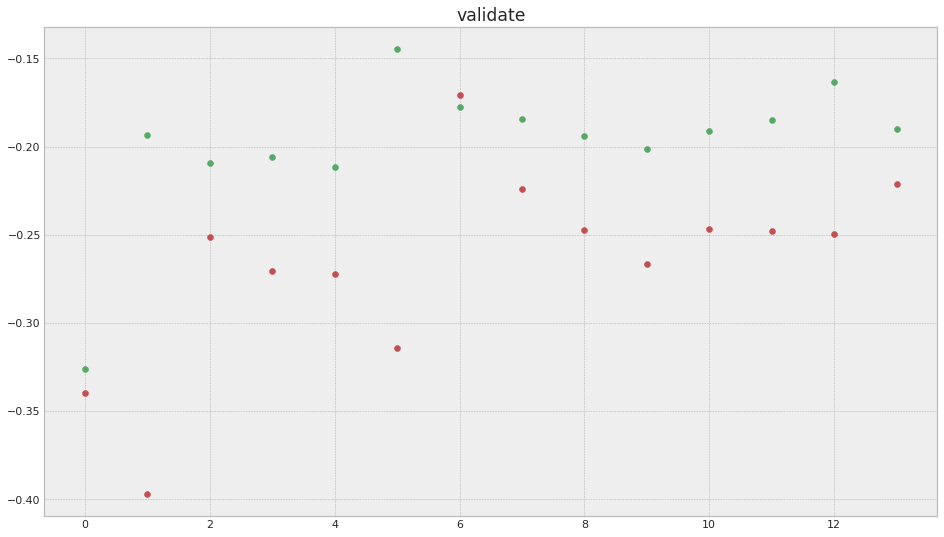

In [49]:
results = model.predict(x_val)

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 9))

plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

En el gráfico vemos que los puntitos verdes intentan aproximarse a los rojos. Cuanto más cerca ó superpuestos mejor.

### Predicción 7 días siguientes

Usaremos los últimos días de diciembre 2019 para calcular la primer semana siguiente...

In [50]:
print(df.index.max())

2019-12-30 00:00:00


In [51]:
ultimosDias = df['2019-12-16':'2019-12-30']
ultimosDias

,Day,High,Low,Open,Close,Volume,AdjClose,Profitability
Date,,,,,,,,
2019-12-16,Monday,7171.168945,6903.682617,7153.663086,6932.480469,20213265949,6932.480469,-0.030734
2019-12-17,Tuesday,6964.075195,6587.974121,6931.315430,6640.515137,22363804217,6640.515137,-0.042116
2019-12-18,Wednesday,7324.984863,6540.049316,6647.698242,7276.802734,31836522778,7276.802734,0.095819
2019-12-19,Thursday,7346.602539,7041.381836,7277.590820,7202.844238,25904604415,7202.844238,-0.010164
2019-12-20,Friday,7257.921875,7086.124023,7208.636719,7218.816406,22633815180,7218.816406,0.002217
2019-12-21,Saturday,7223.226074,7112.735840,7220.593750,7191.158691,19312552168,7191.158691,-0.003831
2019-12-22,Sunday,7518.033203,7167.179199,7191.188477,7511.588867,23134537956,7511.588867,0.044559
2019-12-23,Monday,7656.176270,7326.192383,7508.902344,7355.628418,27831788041,7355.628418,-0.020763
2019-12-24,Tuesday,7535.716797,7269.528809,7354.393066,7322.532227,22991622105,7322.532227,-0.004499


In [52]:
values = ultimosDias.AdjClose.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.329643,-1.000000,0.460926,0.291117,0.327789,0.264286,1.000000
8,-1.000000,0.460926,0.291117,0.327789,0.264286,1.000000,0.641912
9,0.460926,0.291117,0.327789,0.264286,1.000000,0.641912,0.565922
10,0.291117,0.327789,0.264286,1.000000,0.641912,0.565922,0.457146
11,0.327789,0.264286,1.000000,0.641912,0.565922,0.457146,0.374054
12,0.264286,1.000000,0.641912,0.565922,0.457146,0.374054,0.491430
13,1.000000,0.641912,0.565922,0.457146,0.374054,0.491430,0.555494


In [53]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[1.        , 0.64191246, 0.5659218 , 0.4571457 , 0.37405396,
         0.49143028, 0.5554943 ]],

       [[0.64191246, 0.5659218 , 0.4571457 , 0.37405396, 0.49143028,
         0.5554943 , 0.79580116]]], dtype=float32)

In [54]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[1.         0.64191246 0.5659218  0.4571457  0.37405396 0.49143028
   0.5554943 ]]

 [[0.64191246 0.5659218  0.4571457  0.37405396 0.49143028 0.5554943
   0.79580116]]]
[[[0.64191246 0.5659218  0.4571457  0.37405396 0.49143028 0.5554943
   0.53133935]]

 [[0.64191246 0.5659218  0.4571457  0.37405396 0.49143028 0.5554943
   0.79580116]]]
[[[0.5659218  0.4571457  0.37405396 0.49143028 0.5554943  0.53133935
   0.5420636 ]]

 [[0.64191246 0.5659218  0.4571457  0.37405396 0.49143028 0.5554943
   0.79580116]]]
[[[0.4571457  0.37405396 0.49143028 0.5554943  0.53133935 0.5420636
   0.5333039 ]]

 [[0.64191246 0.5659218  0.4571457  0.37405396 0.49143028 0.5554943
   0.79580116]]]
[[[0.37405396 0.49143028 0.5554943  0.53133935 0.5420636  0.5333039
   0.5622984 ]]

 [[0.64191246 0.5659218  0.4571457  0.37405396 0.49143028 0.5554943
   0.79580116]]]
[[[0.49143028 0.5554943  0.53133935 0.5420636  0.5333039  0.5622984
   0.6028135 ]]

 [[0.64191246 0.5659218  0.4571457  0.37405396 0.49143028 0.555

In [55]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[7307.47008498],
       [7312.1408899 ],
       [7308.32572728],
       [7320.9539018 ],
       [7338.59970712],
       [7345.99719693],
       [7350.63965351]])

### Reales 7 dias

In [56]:
real7dias = pdr.DataReader("BTC-USD", start='2019-12-31', end='2020-01-05', data_source='yahoo')
dfreal = pd.DataFrame(real7dias)
dfreal.insert(0,column='Day',value=pd.DatetimeIndex(dfreal.index).day_name())
dfreal.rename(columns={'Adj Close':'AdjCloseReal'}, inplace=True)
dfreal

,Day,High,Low,Open,Close,Volume,AdjCloseReal
Date,,,,,,,
2019-12-31,Tuesday,7335.290039,7169.777832,7294.438965,7193.599121,21167946112,7193.599121
2020-01-01,Wednesday,7254.330566,7174.944336,7194.892090,7200.174316,18565664996,7200.174316
2020-01-02,Thursday,7212.155273,6935.270020,7202.551270,6985.470215,20802083465,6985.470215
2020-01-03,Friday,7413.715332,6914.996094,6984.428711,7344.884277,28111481031,7344.884277
2020-01-04,Saturday,7427.385742,7309.514160,7345.375488,7410.656738,18444271274,7410.656738
2020-01-05,Sunday,7544.497070,7400.535645,7410.451660,7411.317383,19725074094,7411.317383
2020-01-06,Monday,7781.867188,7409.292969,7410.452148,7769.219238,23276261598,7769.219238


In [57]:
dfprediccion = pd.DataFrame(inverted)
dfprediccion.rename(columns={0:'AdjClosePrediccion'}, inplace=True)
dfprediccion.index=dfreal.index

In [58]:
dfreal['AdjClosePrediccion']=dfprediccion['AdjClosePrediccion']
dfreal

,Day,High,Low,Open,Close,Volume,AdjCloseReal,AdjClosePrediccion
Date,,,,,,,,
2019-12-31,Tuesday,7335.290039,7169.777832,7294.438965,7193.599121,21167946112,7193.599121,7307.470085
2020-01-01,Wednesday,7254.330566,7174.944336,7194.892090,7200.174316,18565664996,7200.174316,7312.140890
2020-01-02,Thursday,7212.155273,6935.270020,7202.551270,6985.470215,20802083465,6985.470215,7308.325727
2020-01-03,Friday,7413.715332,6914.996094,6984.428711,7344.884277,28111481031,7344.884277,7320.953902
2020-01-04,Saturday,7427.385742,7309.514160,7345.375488,7410.656738,18444271274,7410.656738,7338.599707
2020-01-05,Sunday,7544.497070,7400.535645,7410.451660,7411.317383,19725074094,7411.317383,7345.997197
2020-01-06,Monday,7781.867188,7409.292969,7410.452148,7769.219238,23276261598,7769.219238,7350.639654


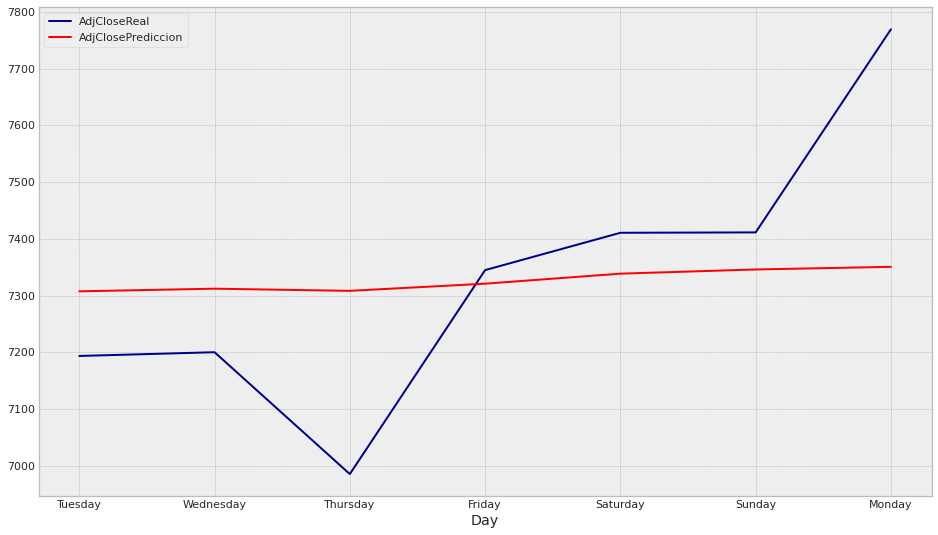

In [59]:
plt.style.use('bmh')
dfreal.plot('Day',['AdjCloseReal','AdjClosePrediccion'], kind='line', figsize=(16,9), color=['darkblue','red'])